<a href="https://colab.research.google.com/github/mano-4124/Manoj/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-3180088027.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
/tmp/ipython-input-1-3180088027.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

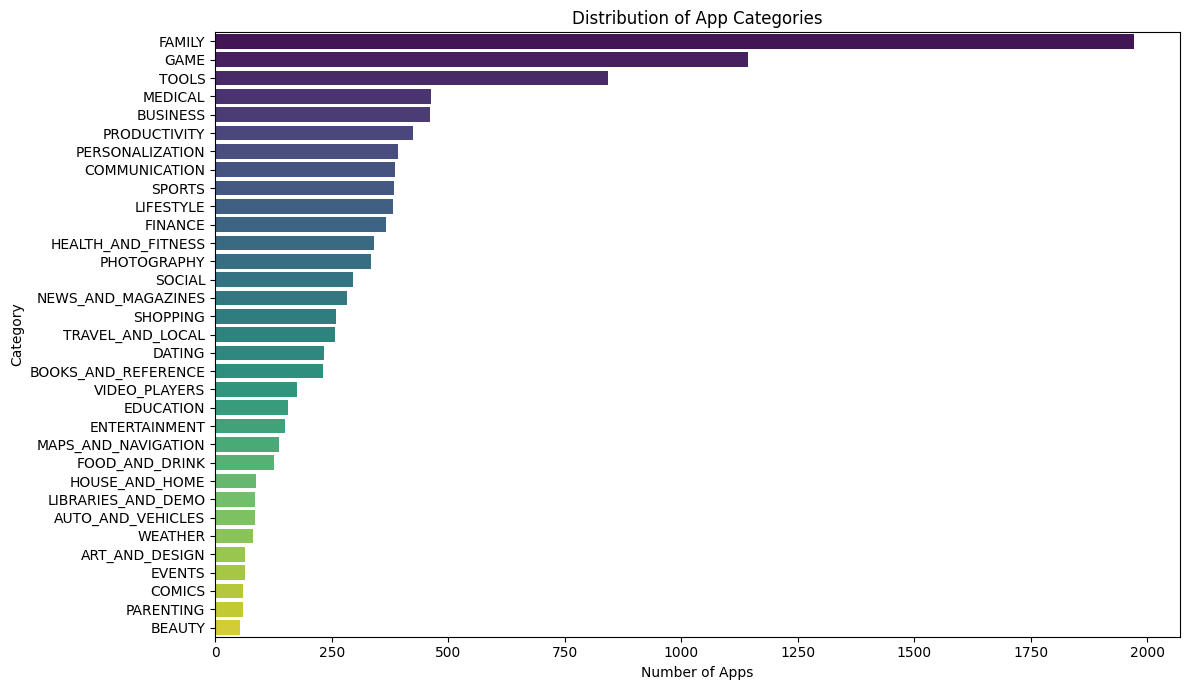

/tmp/ipython-input-1-3180088027.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='magma')


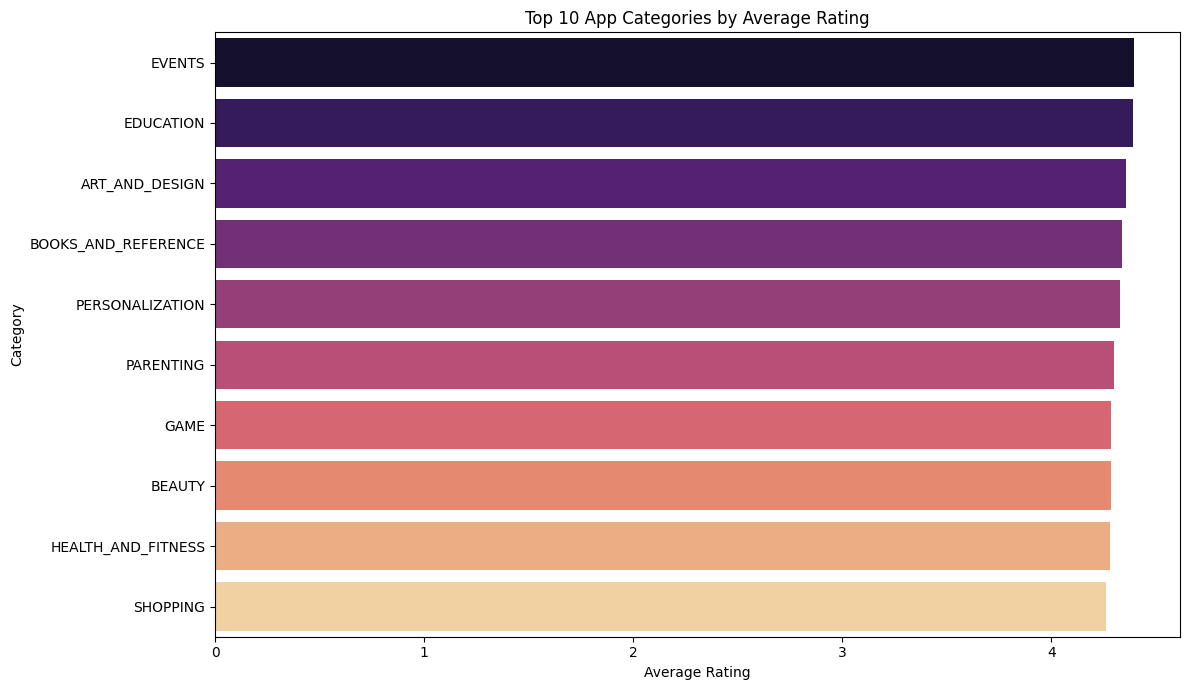

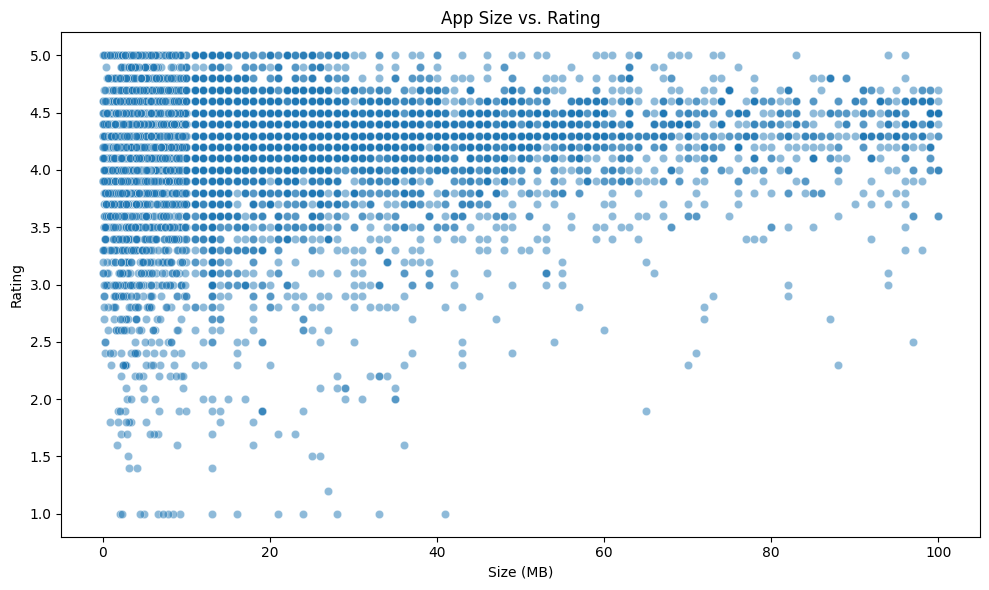

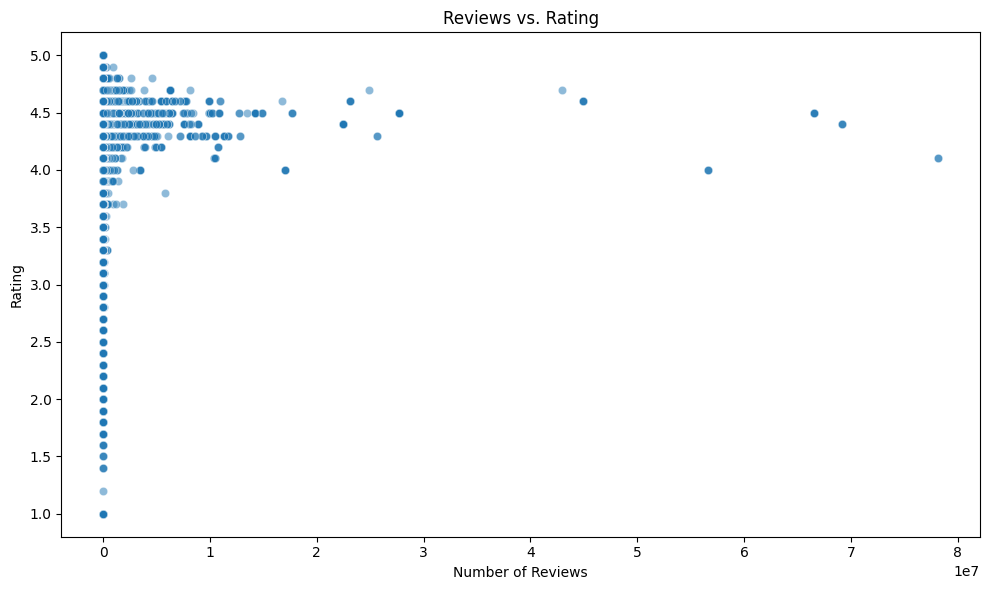

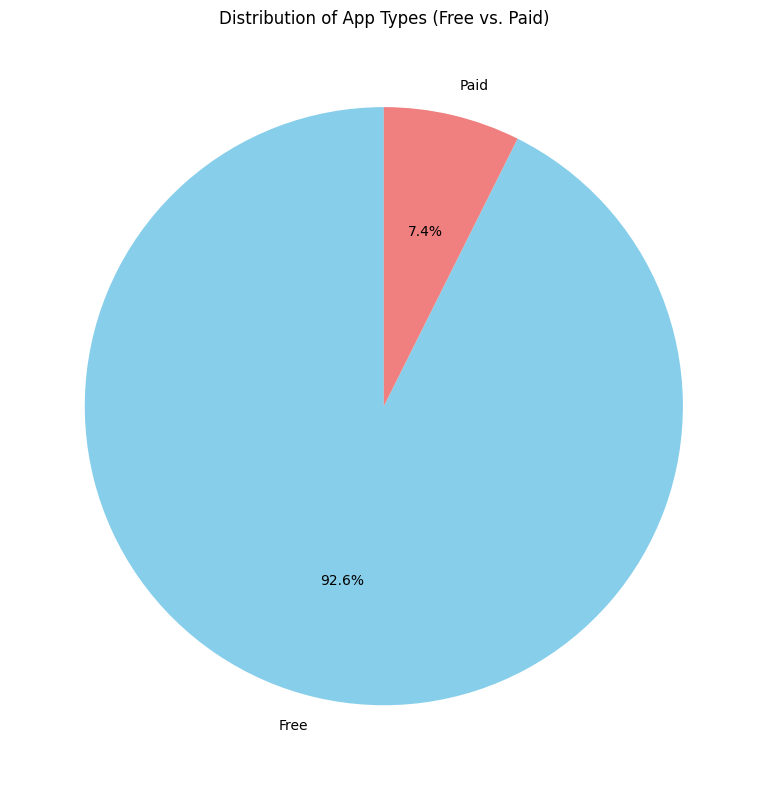

/tmp/ipython-input-1-3180088027.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_installs_by_content_rating.index, y=avg_installs_by_content_rating.values, palette='plasma')


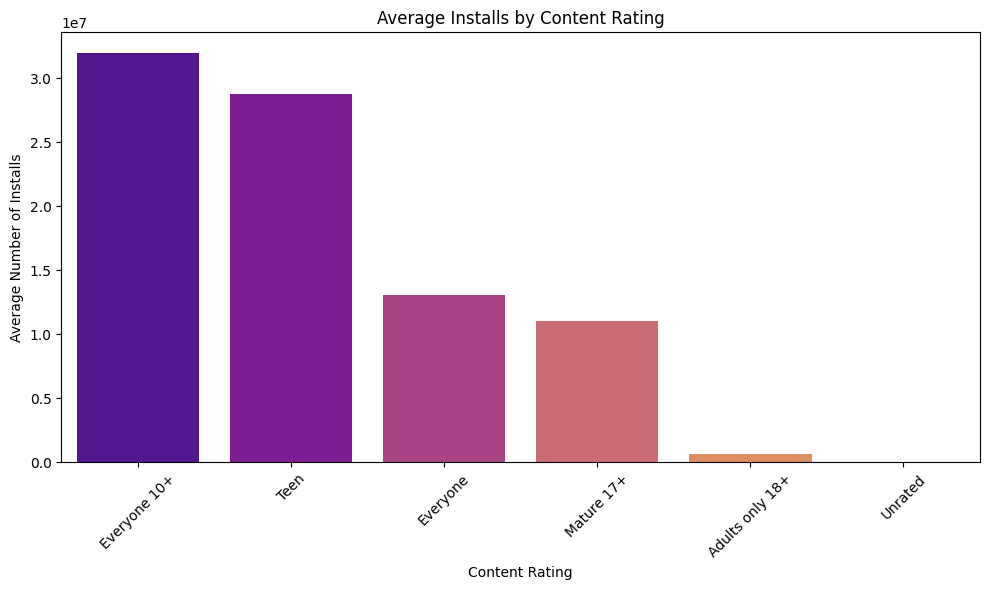

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Play Store Data.csv')

# --- Data Cleaning ---

# 1. Handle missing 'Rating' values
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# 2. Clean 'Reviews' column
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# 3. Clean 'Size' column
# Function to convert size to MB
def convert_size_to_mb(size):
    if 'M' in str(size):
        return float(str(size).replace('M', ''))
    elif 'k' in str(size):
        return float(str(size).replace('k', '')) / 1024
    else: # 'Varies with device' or other non-numeric values
        return np.nan

df['Size'] = df['Size'].apply(convert_size_to_mb)
df['Size'].fillna(df['Size'].median(), inplace=True) # Fill missing/converted to NaN sizes with median

# 4. Clean 'Installs' column
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '').replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# 5. Clean 'Price' column
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', ''))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 6. Handle missing 'Type' and 'Content Rating' values
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)

# Filter out rows where 'Rating' is greater than 5 (data anomaly)
df = df[df['Rating'] <= 5]

# --- Data Visualization ---

# 1. Distribution of App Categories
plt.figure(figsize=(12, 7))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Distribution of App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('app_category_distribution.png')
plt.show()

# 2. Top 10 App Categories by Average Rating
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='magma')
plt.title('Top 10 App Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('top_10_categories_by_rating.png')
plt.show()

# 3. Relationship between App Size and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.5)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig('size_vs_rating.png')
plt.show()

# 4. Relationship between Reviews and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.5)
plt.title('Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig('reviews_vs_rating.png')
plt.show()

# 5. Distribution of App Types (Free vs. Paid)
plt.figure(figsize=(8, 8))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of App Types (Free vs. Paid)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('app_type_distribution.png')
plt.show()

# 6. Average Installs by Content Rating
avg_installs_by_content_rating = df.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_installs_by_content_rating.index, y=avg_installs_by_content_rating.values, palette='plasma')
plt.title('Average Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Number of Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_installs_by_content_rating.png')
plt.show()